# Set up

Prior to Python, I had only used R, so I was surprised to learn that you need to import libraries for routine tasks like handling a dataframe, doing vectorized math, and data visualization. This is what we are doing below.

In [1]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

This makes Python read our data table

In [2]:
# Importing the csv
climate_essay_df = pd.read_csv('data_noID.csv')

# How big is this dataframe
climate_essay_df.shape

(1793, 104)

That's a lot of columns to deal with...
<br>Let's focus on the essays written about climate change and the respondants' donations and essays

In [3]:
subsetted_df = climate_essay_df[climate_essay_df['trt1'] == 1]
subsetted_df = subsetted_df[['trt1', 'don', 'essay']]
subsetted_df = subsetted_df.reset_index(drop = True)
subsetted_df.shape

(589, 3)

In [4]:
subsetted_df.head(5)

,trt1,don,essay
0,1,15.0,"Dear Adelyn, \n Today is January 7, 2015. I kn..."
1,1,0.0,To whom it may concern in 2050:\n\nThis is 201...
2,1,19.0,"Dear son,\n This is your mother from 2015 w..."
3,1,15.0,"Dear J-Swag,\n I want you to know how much I l..."
4,1,0.0,"Dear Kailey,\nYou will be reading this in the ..."


# Exploratory Data Analysis

What does this text look like? Well it's stored in the `essay` column, so let's view a random entry

In [81]:
random_row = np.random.choice(len(subsetted_df))

subsetted_df['essay'][random_row]

"Dear Em,\nI used public transportation, rode a bicycle, walked. I used CFL lightbulbs. I consumed the least amount of energy as possible and I always tried to use green products. Instead of a desktop computer I used a netbook. I only owned small mobile devices. I didn't drive more when gas was cheap. I spent as much time doing outside activities as possible and whenever there was an opportunity I used alternative energy. There wasn't much I could do on a large scale but many people were doing a small part. When I was young some people didn't believe in the greenhouse affect, so it was hard to convince people that it was a serious problem. "

Let's figure out how many words people wrote for the essays

In [6]:
# Creating an empty vector to store word counts in
word_counts_list = []

# For-looping over all the rows
for row in range(len(subsetted_df)):
    # Storing the text from each row
    sentence = subsetted_df['essay'][row]
    # Splitting the string vector into a list of individual words
    words = sentence.split()
    # Getting the length of that list
    word_count = len(words)
    # Appending that to our growing list
    word_counts_list.append(word_count)

Plot the word counts

(array([170., 204., 119.,  59.,  16.,  10.,   4.,   3.,   3.,   1.]),
 array([ 84., 139., 194., 249., 304., 359., 414., 469., 524., 579., 634.]),
 <a list of 10 Patch objects>)

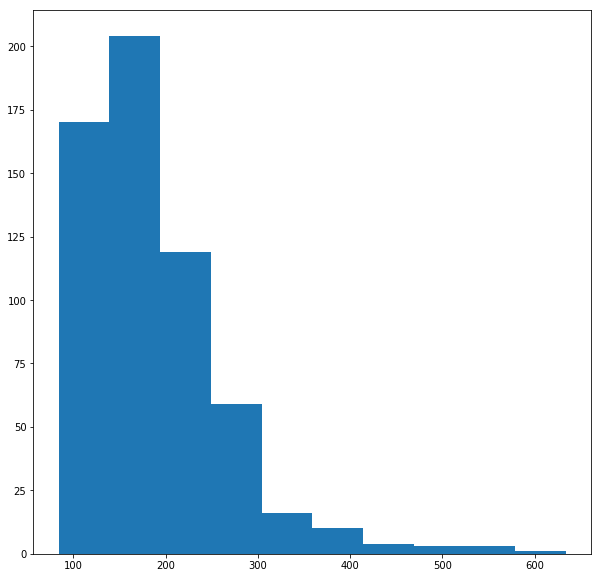

In [7]:
# View the distribution of word counts within essays
plt.hist(word_counts_list)

That's kind of ugly, and what's up with all those arrays and numbers?
<br>Let's clean this up a little bit

The average number of words written is 186.319185


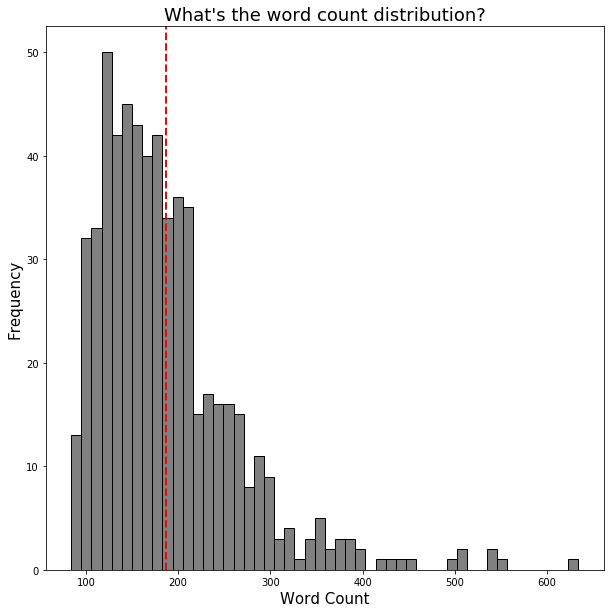

In [82]:
average_word_count = np.mean(word_counts_list)
print('The average number of words written is %0.6f' % average_word_count)

plt.hist(word_counts_list, bins = 50, color = 'grey', edgecolor = 'black')
plt.xlabel('Word Count', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("What's the word count distribution?", fontsize = 18)
plt.axvline(x = average_word_count, lw = 2, color = 'red', linestyle = '--');

What about the donations that people chose to give?

(array([168.,  31., 101.,   4.,   0., 167.,   5.,  34.,   4.,  75.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

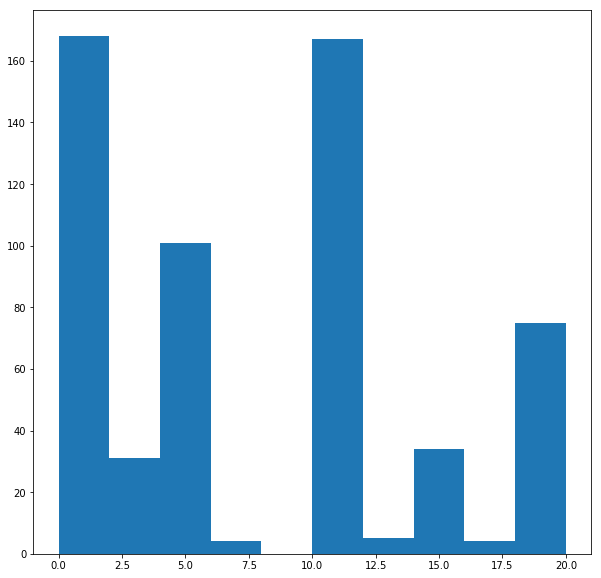

In [9]:
plt.hist(subsetted_df['don'])

The average number of words written is 7.522920


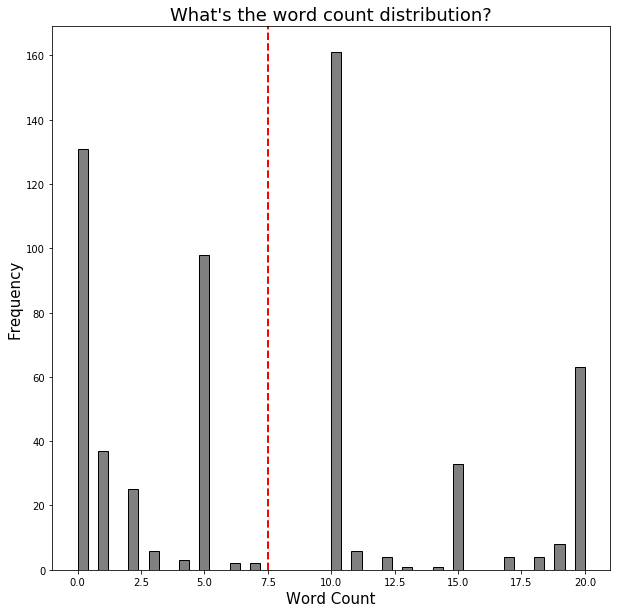

In [84]:
average_donation = np.mean(subsetted_df['don'])
print('The average number of words written is %0.6f' % average_donation)

plt.hist(subsetted_df['don'], bins = 50, color = 'grey', edgecolor = 'black')
plt.xlabel('Word Count', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("What's the word count distribution?", fontsize = 18)
plt.axvline(x = average_donation, lw = 2, color = 'red', linestyle = '--');

It would seem that there are two groups within this distribution, those that were strongly convinced and gave over 50% of their gift towards climate change donations, and those that were not.

In [85]:
subsetted_df['big_donator'] = (subsetted_df['don'] > 8.5)
subsetted_df['big_donator'] = subsetted_df['big_donator'].astype(int)
subsetted_df.head()

,trt1,don,essay,big_donator
0,1,15.0,"Dear Adelyn, \n Today is January 7, 2015. I kn...",1
1,1,0.0,To whom it may concern in 2050:\n\nThis is 201...,0
2,1,19.0,"Dear son,\n This is your mother from 2015 w...",1
3,1,15.0,"Dear J-Swag,\n I want you to know how much I l...",1
4,1,0.0,"Dear Kailey,\nYou will be reading this in the ...",0


What's the distribution here?

In [12]:
subsetted_df['big_donator'].value_counts()

0    304
1    285
Name: big_donator, dtype: int64

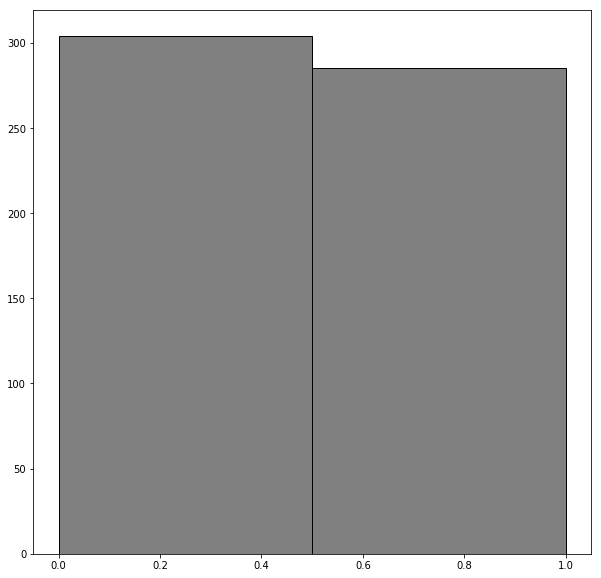

In [90]:
plt.hist(subsetted_df['big_donator'], bins = 2, edgecolor = 'black', color = 'grey');

# Text Processing

Importing some sklearn functions which are helpful prior to fitting a model

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Data split for evaluation

In [92]:
train_df, test_df = train_test_split(subsetted_df, test_size = 0.2, random_state = 123)

Some data conversion
<br>The essays are currently in a Panda's DataFrame column, it would be more reasonable to have them as a vector (`np.ndarray`) of strings. This data structure carries less formatting and is more generalizable than a data frame column.

In [93]:
# Converting the Panda's formal dataframe column into a standard vector of strings
train_essays = train_df['essay'].values
test_essays = test_df['essay'].values

train_essays[0]

'Dear Danny,\n     So it is 2015 and I am concerned about you and your brother\'s future. Your father and I see on the news all of the time about how the polar ice caps are melting. We know that if this happens there will be great floods in the coastal cities such as New York. Floods in all major coastal cities would cause millions or even billions of people worldwide to relocate further inland, which could then put a major strain on resources. It will be 2050 by the time you are reading this and I suppose by then some of the extreme consequences of our pollution of the earth will have taken effect. My only prayer is that between now and then, enough people around the world will have changed their ways enough to save our planet.\n    Our family will do its part by driving less, walking more, and recycling. Right now our habits in these areas have a lot of room to improve. Your brothers and father most certainly do not consider what they are throwing away and whether or not it could be 

Let's get a count of words

In [94]:
word_counter = CountVectorizer()

word_counter.fit(train_essays)

test_word_counts = word_counter.transform(test_essays)
train_word_counts = word_counter.transform(train_essays)
train_word_counts

<471x5394 sparse matrix of type '<class 'numpy.int64'>'
	with 52240 stored elements in Compressed Sparse Row format>

What in the world is that?
<br>Because most words won't be present in any given paragraph, the resulting word counts are mostly zeros. Since it's mostly empty, it's nice to prevent printing out 1000s of zeros, so it is stored as a sparse matrix. We can try to inspect it, but, in reality, it's too much, as shown below.

In [95]:
train_word_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Well, how can we trust this?
<br>We can inspect the attributes that this `word_counter` has learned

In [96]:
learned_words = word_counter.get_feature_names()

print(learned_words[0:10])
print(learned_words[-10:])
print("\nIn total, it learned %0.6f words" % len(word_counter.get_feature_names()))

['000', '01', '02', '10', '100', '10000x', '11', '12', '120', '12x6x']
['youth', 'yrs', 'yyyyyyyyyyy', 'zabiah', 'zach', 'zayna', 'zero', 'ziplock', 'zoo', 'zzzzzzzzzzz']

In total, it learned 5394.000000 words


What are the individual word counts?

In [97]:
word_counter.vocabulary_

{'dear': 1234,
 'danny': 1212,
 'so': 4438,
 'it': 2654,
 'is': 2642,
 '2015': 41,
 'and': 312,
 'am': 291,
 'concerned': 1000,
 'about': 102,
 'you': 5376,
 'your': 5380,
 'brother': 655,
 'future': 2057,
 'father': 1859,
 'see': 4270,
 'on': 3358,
 'the': 4780,
 'news': 3256,
 'all': 262,
 'of': 3340,
 'time': 4843,
 'how': 2396,
 'polar': 3624,
 'ice': 2435,
 'caps': 738,
 'are': 364,
 'melting': 3048,
 'we': 5221,
 'know': 2741,
 'that': 4778,
 'if': 2447,
 'this': 4805,
 'happens': 2248,
 'there': 4790,
 'will': 5281,
 'be': 487,
 'great': 2176,
 'floods': 1940,
 'in': 2494,
 'coastal': 919,
 'cities': 867,
 'such': 4626,
 'as': 383,
 'new': 3253,
 'york': 5375,
 'major': 2970,
 'would': 5343,
 'cause': 780,
 'millions': 3099,
 'or': 3387,
 'even': 1705,
 'billions': 563,
 'people': 3522,
 'worldwide': 5330,
 'to': 4853,
 'relocate': 4022,
 'further': 2052,
 'inland': 2563,
 'which': 5265,
 'could': 1122,
 'then': 4787,
 'put': 3842,
 'strain': 4576,
 'resources': 4083,
 '2050': 4

# Logistic Regression Model

Importing some sklearn functions that are important to fitting a model

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Getting the target variables in a less-formated structure

In [99]:
test_Y = test_df['big_donator'].values
train_Y = train_df['big_donator'].values

Fitting a logistic regression model based on 5-fold cross validation grid search with several regularization options

In [100]:
classifier = LogisticRegression(random_state = 123)
regularization_options = [{'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_classifier = GridSearchCV(classifier, regularization_options, cv = 5)

gs_classifier.fit(X = train_word_counts, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Model Evaluation

Importing some sklearn functions that are helpful after fitting a model

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Train set - In sample

Determining the training set accuracy

In [102]:
train_predictions = gs_classifier.predict(X = train_word_counts)

accuracy_score(train_predictions, train_Y)

1.0

Viewing the confusion matrix

In [103]:
confusion_matrix(train_predictions, train_Y)

array([[249,   0],
       [  0, 222]])

### Test set - Out of sample

In [104]:
test_predictions = gs_classifier.predict(X = test_word_counts)

accuracy_score(test_predictions, test_Y)

0.5677966101694916

In [105]:
confusion_matrix(test_predictions, test_Y)

array([[35, 31],
       [20, 32]])

# Other Ways to Quantify Text

## 1. Inverse frequency counting

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [107]:
inverse_freq_counter = TfidfVectorizer(ngram_range = (1, 1))

sentence_array = np.array(['I work in CIRES', 'I work at Earth Lab', 'Work is work'])

inverse_freq_counter.fit(sentence_array)
inverse_freq_counter.get_feature_names()

['at', 'cires', 'earth', 'in', 'is', 'lab', 'work']

In [108]:
tf_idf_weightings = inverse_freq_counter.transform(sentence_array)
tf_idf_weightings.todense()

matrix([[0.        , 0.65249088, 0.        , 0.65249088, 0.        ,
         0.        , 0.38537163],
        [0.54645401, 0.        , 0.54645401, 0.        , 0.        ,
         0.54645401, 0.32274454],
        [0.        , 0.        , 0.        , 0.        , 0.64612892,
         0.        , 0.76322829]])

In [109]:
word_counter_proof = CountVectorizer(ngram_range = (1, 1))

word_counter_proof.fit(sentence_array)

word_count_values = word_counter_proof.transform(sentence_array)
word_count_values.todense()

matrix([[0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 2]])

## 2. Word Embeddings/Vectors

In [110]:
import gensim
import nltk

In [111]:
tokens_x = [nltk.word_tokenize(sent) for sent in train_essays]
len(tokens_x)

471

In [112]:
tokens_x[1][0:10]

['Hello',
 'Dolly',
 '.',
 'I',
 'hope',
 'the',
 'future',
 'has',
 'been',
 'treating']

In [113]:
model = gensim.models.Word2Vec(tokens_x, size = 5, window = 5)

In [114]:
test_sentence = 'This is a test sentence, what happens to it?'

tokens_example = nltk.word_tokenize(test_sentence)
tokens_example

['This',
 'is',
 'a',
 'test',
 'sentence',
 ',',
 'what',
 'happens',
 'to',
 'it',
 '?']

In [115]:
for word in tokens_example:
    print(model[word])

[-1.8697404  -1.1264204   2.0192695   0.24283251  0.2014476 ]
[-1.7453357 -1.260286   2.8344913  1.2435861 -1.0415206]
[-2.1494083  -0.9050794   2.2416732   0.3839731   0.47371662]


/home/jeremydiaz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


KeyError: "word 'test' not in vocabulary"

In [38]:
for word in tokens_example:
    try:
        print(model[word])
    except KeyError as e:
        print(e)

[-1.8162369  -1.0420732   1.9881457   0.2842236   0.23079574]
[-1.8907498 -1.4257478  2.8059077  0.850617  -1.2875135]
[-2.0978358  -0.8234827   2.3712845  -0.06690007  0.6195568 ]
"word 'test' not in vocabulary"
"word 'sentence' not in vocabulary"
[-1.990837   -1.0066156   2.3353326   0.613757    0.33771878]
[-2.1642177 -0.8073379  1.5481079  1.5244279  0.5932045]
[-0.3323422  -0.09367114  0.28719804  0.2183071   0.06949965]
[-2.5557687 -1.0235254  1.432034  -0.605983   1.5653288]
[-1.9367899  -1.0870419   2.2694805   1.5316712   0.10419065]
[-2.378586  -1.2535206  2.2410386  0.7709378  0.5518615]


/home/jeremydiaz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


## 3. Sentence Embeddings/Vectors

In [39]:
%cd
%cd generating-reviews-discovering-sentiment/

from encoder import Model
model = Model()

%cd
%cd ML_Workshop_Series

/home/jeremydiaz
/home/jeremydiaz/generating-reviews-discovering-sentiment


/home/jeremydiaz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
dim is deprecated, use axis instead
/home/jeremydiaz
/home/jeremydiaz/ML_Workshop_Series


In [50]:
Obama_tweet = "This week—50 years since Dr. Martin Luther King, Jr. was killed—@BarackObama and @RepJohnLewis sat down with a group of young men for an @MBK_Alliance roundtable to talk about Dr. King's legacy and the courage it takes to stand up for what you believe in: http://go.obama.org/mlk50 "
Trump_tweet = "Much of the bad blood with Russia is caused by the Fake & Corrupt Russia Investigation, headed up by the all Democrat loyalists, or people that worked for Obama. Mueller is most conflicted of all (except Rosenstein who signed FISA & Comey letter). No Collusion, so they go crazy!"

In [51]:
Obama_vector = model.transform([Obama_tweet])
Trump_vector = model.transform([Trump_tweet])

6.708 seconds to transform 1 examples
6.261 seconds to transform 1 examples


In [52]:
Obama_vector.shape

(1, 4096)

In [59]:
comparison_tweet = "Why would Kim Jong-un insult me by calling me old, when I would NEVER call him short and fat? Oh well, I try so hard to be his friend - and maybe someday that will happen!"
comparison_vector = model.transform([comparison_tweet])

4.657 seconds to transform 1 examples


In [60]:
print(np.square(np.sum(comparison_vector - Obama_vector)))
print(np.square(np.sum(comparison_vector - Trump_vector)))

18.761555
1.5705808


## 4. Latent Dirichlet Allocation

In [61]:
from gensim import corpora

import string

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

In [62]:
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    three = " ".join(lemmatize.lemmatize(i) for i in two.split())
    return three

In [63]:
only_essays = pd.DataFrame(subsetted_df['essay'])
text = only_essays.applymap(cleaning)['essay']
text_list = [i.split() for i in text]
len(text_list)

589

In [64]:
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(5668 unique tokens: ['2015', '37', '7', 'ability', 'adelyn']...)


In [65]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

In [69]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [70]:
ldamodel.print_topics(5)

[(0,
  '0.012*"change" + 0.012*"climate" + 0.008*"energy" + 0.007*"help" + 0.007*"time" + 0.006*"use" + 0.006*"earth" + 0.006*"year" + 0.006*"many" + 0.006*"hope"'),
 (1,
  '0.010*"use" + 0.010*"hope" + 0.009*"year" + 0.008*"change" + 0.008*"thing" + 0.007*"make" + 0.007*"help" + 0.007*"energy" + 0.006*"time" + 0.006*"efficient"'),
 (2,
  '0.008*"people" + 0.006*"would" + 0.006*"world" + 0.006*"year" + 0.006*"earth" + 0.005*"life" + 0.005*"change" + 0.005*"time" + 0.004*"planet" + 0.004*"climate"'),
 (3,
  '0.022*"change" + 0.018*"climate" + 0.012*"hope" + 0.009*"thing" + 0.009*"world" + 0.008*"people" + 0.008*"make" + 0.008*"earth" + 0.008*"future" + 0.008*"energy"'),
 (4,
  '0.009*"climate" + 0.008*"change" + 0.004*"believe" + 0.004*"people" + 0.003*"car" + 0.003*"way" + 0.003*"much" + 0.003*"probably" + 0.003*"remember" + 0.003*"you"')]

<br><br><br>

# Predicting donations

In [71]:
train_df, test_df = train_test_split(subsetted_df, test_size = 0.2)

train_Y = train_df['don'].values
test_Y = test_df['don'].values

train_essays = train_df['essay'].values
test_essays = test_df['essay'].values

word_counter = CountVectorizer()
word_counter.fit(train_essays)

train_word_counts = word_counter.transform(train_essays)
test_word_counts = word_counter.transform(test_essays)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regressor = LinearRegression()
regressor.fit(X = train_word_counts, y = train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

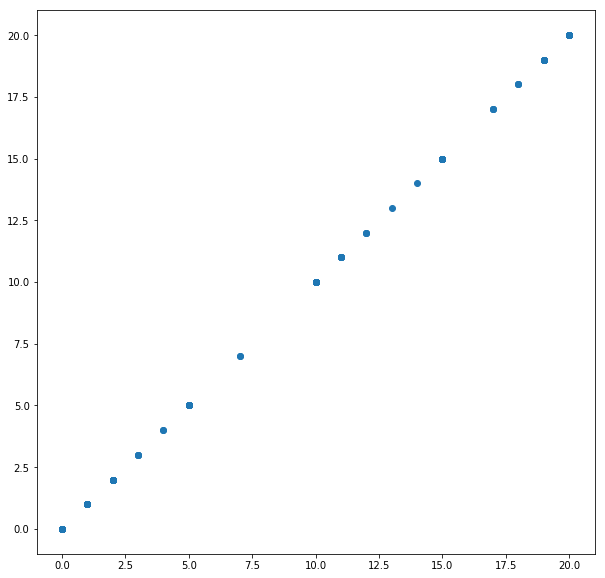

In [74]:
train_predictions = regressor.predict(train_word_counts)
plt.scatter(train_predictions, train_Y)

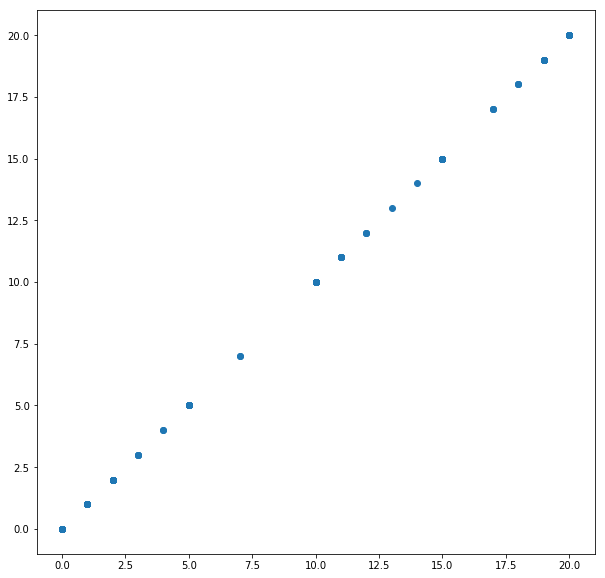

In [75]:
plt.scatter(train_predictions, train_Y)

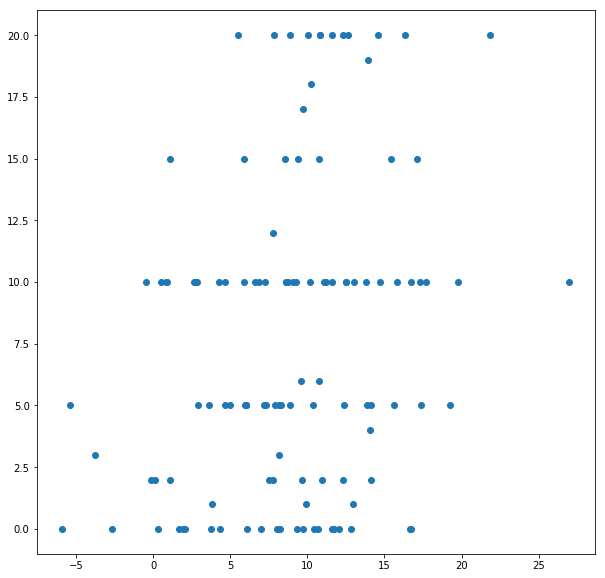

In [76]:
test_predictions = regressor.predict(test_word_counts)
plt.scatter(test_predictions, test_Y)

<br><br><br>

In [77]:
from sklearn.linear_model import Ridge

In [78]:
regressor = Ridge()
regularization_options = [{'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_regressor = GridSearchCV(regressor, regularization_options, cv = 5)

gs_regressor.fit(X = train_word_counts, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

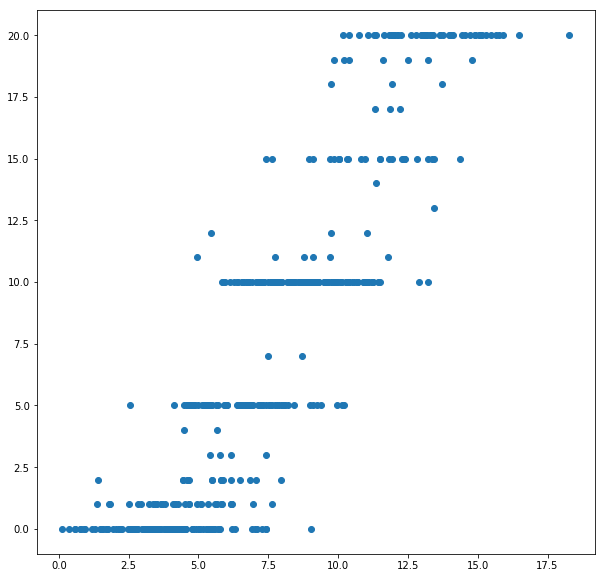

In [79]:
train_predictions = gs_regressor.predict(train_word_counts)
plt.scatter(train_predictions, train_Y)

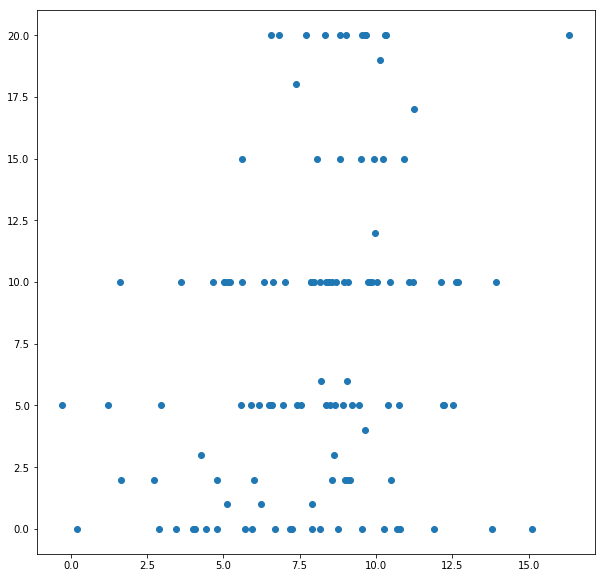

In [80]:
test_predictions = gs_regressor.predict(test_word_counts)
plt.scatter(test_predictions, test_Y)